# 🛂 US Visa Prediction Project

## 📌 Project Overview

This project aims to develop a Machine Learning classification model to predict whether a US work visa will be **approved or denied** based on historical visa application data.

The United States' **Immigration and Nationality Act (INA)** allows foreign workers to work in the US on either a temporary or permanent basis. The **Office of Foreign Labor Certification (OFLC)** oversees these immigration programs and ensures that foreign labor does not negatively impact the job opportunities and wages of US workers.

Due to the high number of visa applications in recent years, OFLC is seeking to automate the process of **shortlisting suitable applicants** using machine learning techniques.

---

## 🎯 Problem Statement

OFLC grants job certifications to employers looking to hire foreign workers. With a surge in applications, it has become crucial to predict the outcome (certified/denied) of a visa application using machine learning models.

The goal of this project is to:

- Build a **classification model** to predict visa approval.
- Use historical application data to learn patterns and criteria influencing the decisions.
- Provide insights and recommendation profiles for better decision-making.

---

## 🔁 Machine Learning Project Lifecycle

Below are the key steps followed in this ML project:

### 1. 🧠 Understanding the Problem Statement
Understanding the visa process, the data involved, and the prediction objective.

### 2. 📥 Data Collection
Data was sourced from official OFLC records containing historical visa application data.

### 3. 📊 Exploratory Data Analysis (EDA)
Analyzing patterns, distributions, relationships, and trends in the dataset.

### 4. 🧹 Data Cleaning
Handling missing values, duplicates, outliers, and formatting issues.

### 5. ⚙️ Data Pre-Processing
Encoding categorical variables, scaling numerical features, and preparing the data for training.

### 6. 🏋️ Model Training
Training different classification algorithms to find the most accurate model.

### 7. 🏆 Choose the Best Model
Evaluating models using performance metrics like accuracy, precision, recall, and F1-score to select the best one for deployment.

---

## ✅ Outcome

By the end of the project, we will have a trained classification model that:

- Predicts the **approval status** of US work visa applications.
- Identifies key features that influence visa approval or denial.
- Assists stakeholders in **automated, data-driven decision making**.



In [37]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [15]:
df = pd.read_csv(r'C:\Users\KARIM\Downloads\US_VISA\data\Visadataset.csv')
df.head()   

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [16]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [19]:
df.drop('case_id',axis=1, inplace=True)

In [20]:
df.shape

(25480, 11)

In [21]:
# Display summary statistics for a dataframe
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [33]:
df.describe(include=[object]) 

,continent,education_of_employee,has_job_experience,requires_job_training,region_of_employment,unit_of_wage,full_time_position,case_status
count,25480,25480,25480,25480,25480,25480,25480,25480
unique,6,4,2,2,5,4,2,2
top,Asia,Bachelor's,Y,N,Northeast,Year,Y,Certified
freq,16861,10234,14802,22525,7195,22962,22773,17018


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.1+ MB


## EXPLORING DATA

In [23]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [24]:
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

We have 8 categorical features : ['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [25]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: continent, dtype: float64
---------------------------
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: education_of_employee, dtype: float64
---------------------------
Y    58.092622
N    41.907378
Name: has_job_experience, dtype: float64
---------------------------
N    88.402669
Y    11.597331
Name: requires_job_training, dtype: float64
---------------------------
Northeast    28.237834
South        27.539246
West         25.847724
Midwest      16.903454
Island        1.471743
Name: region_of_employment, dtype: float64
---------------------------
Year     90.117739
Hour      8.465463
Week      1.067504
Month     0.349294
Name: unit_of_wage, dtype: float64
---------------------------
Y    89.375981
N    10.624019
Name: full_time_position, dtype: float64
---------

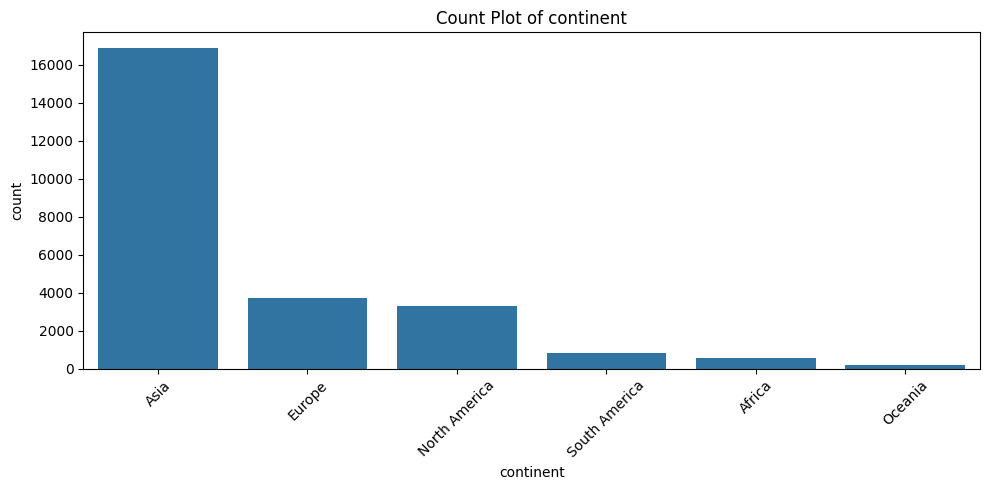

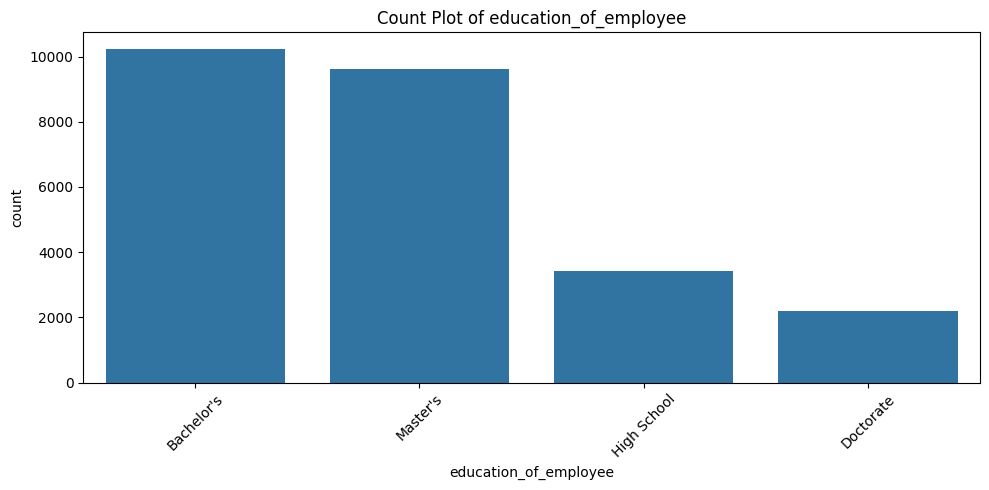

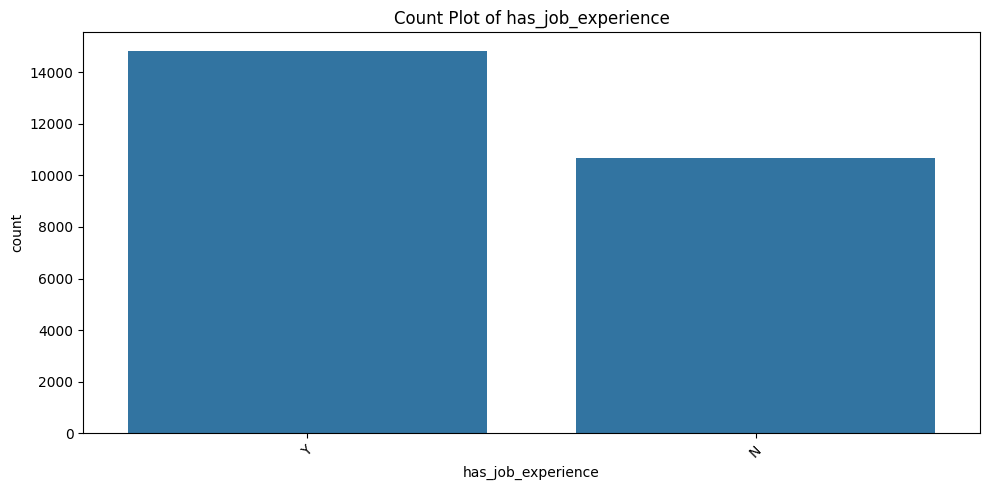

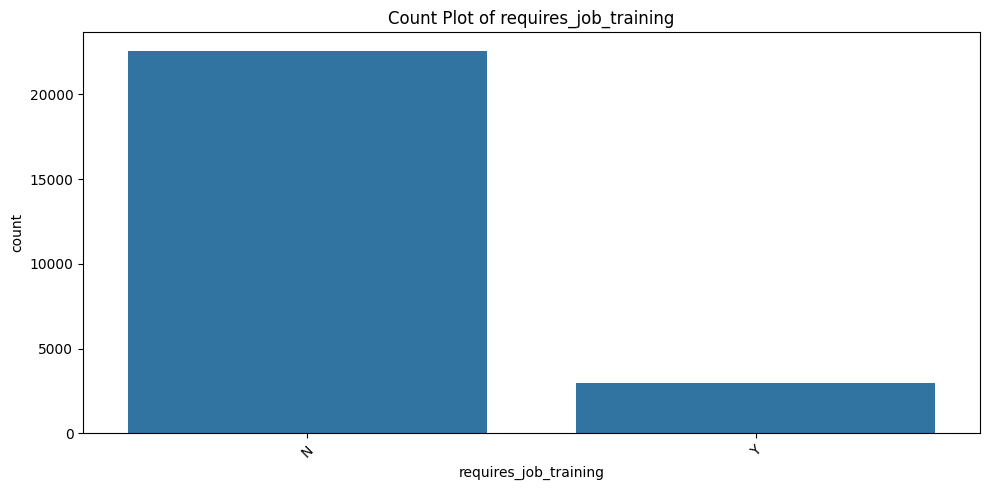

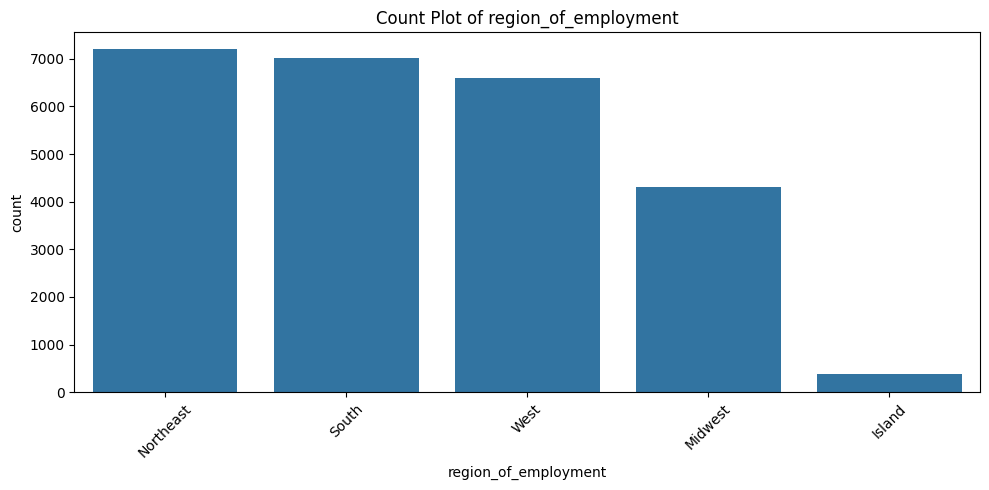

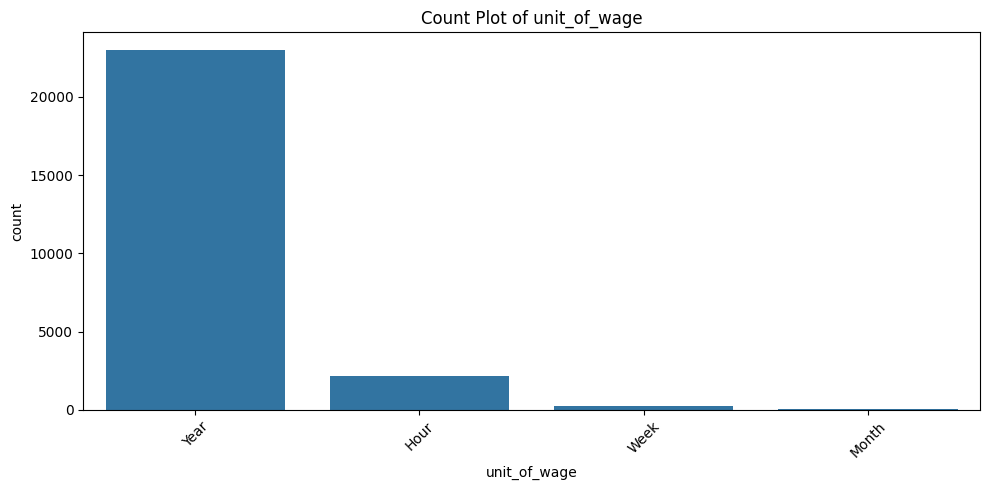

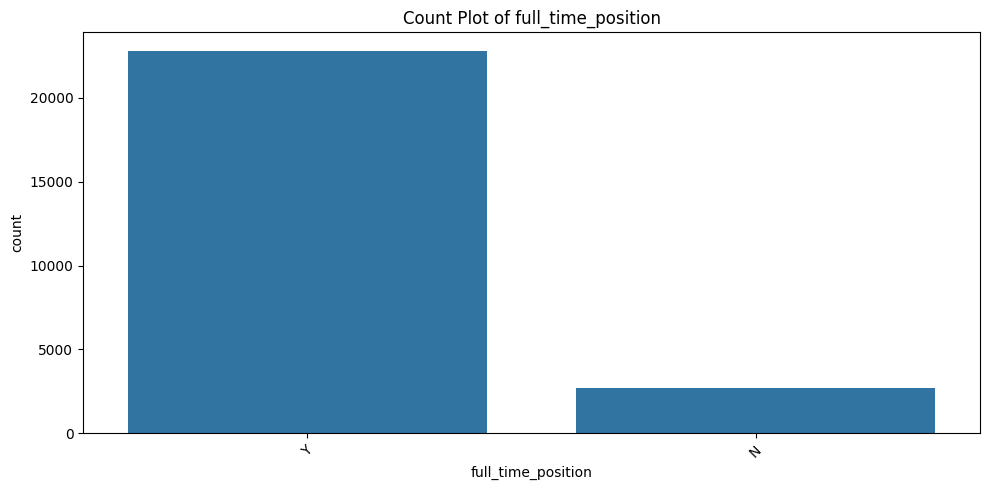

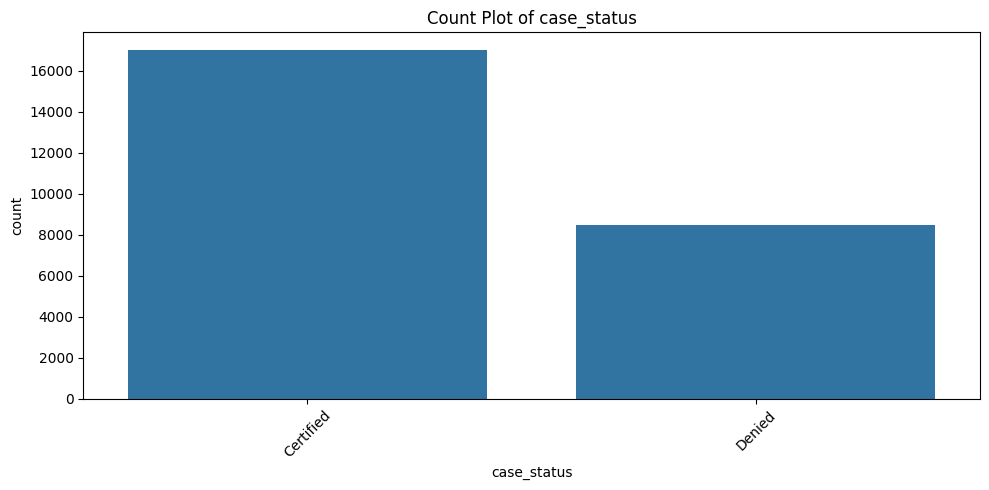

In [27]:
for col in categorical_features:
        plt.figure(figsize=(10, 5))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f'Count Plot of {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# 🧠 Insights

- The `continent` column is **highly biased** towards **Asia**. To reduce this bias, we can **combine other continents into a single category**.
- `unit_of_wage` appears to be a **significant feature**, as the majority of the entries are **yearly contracts**.


## Numerical Features

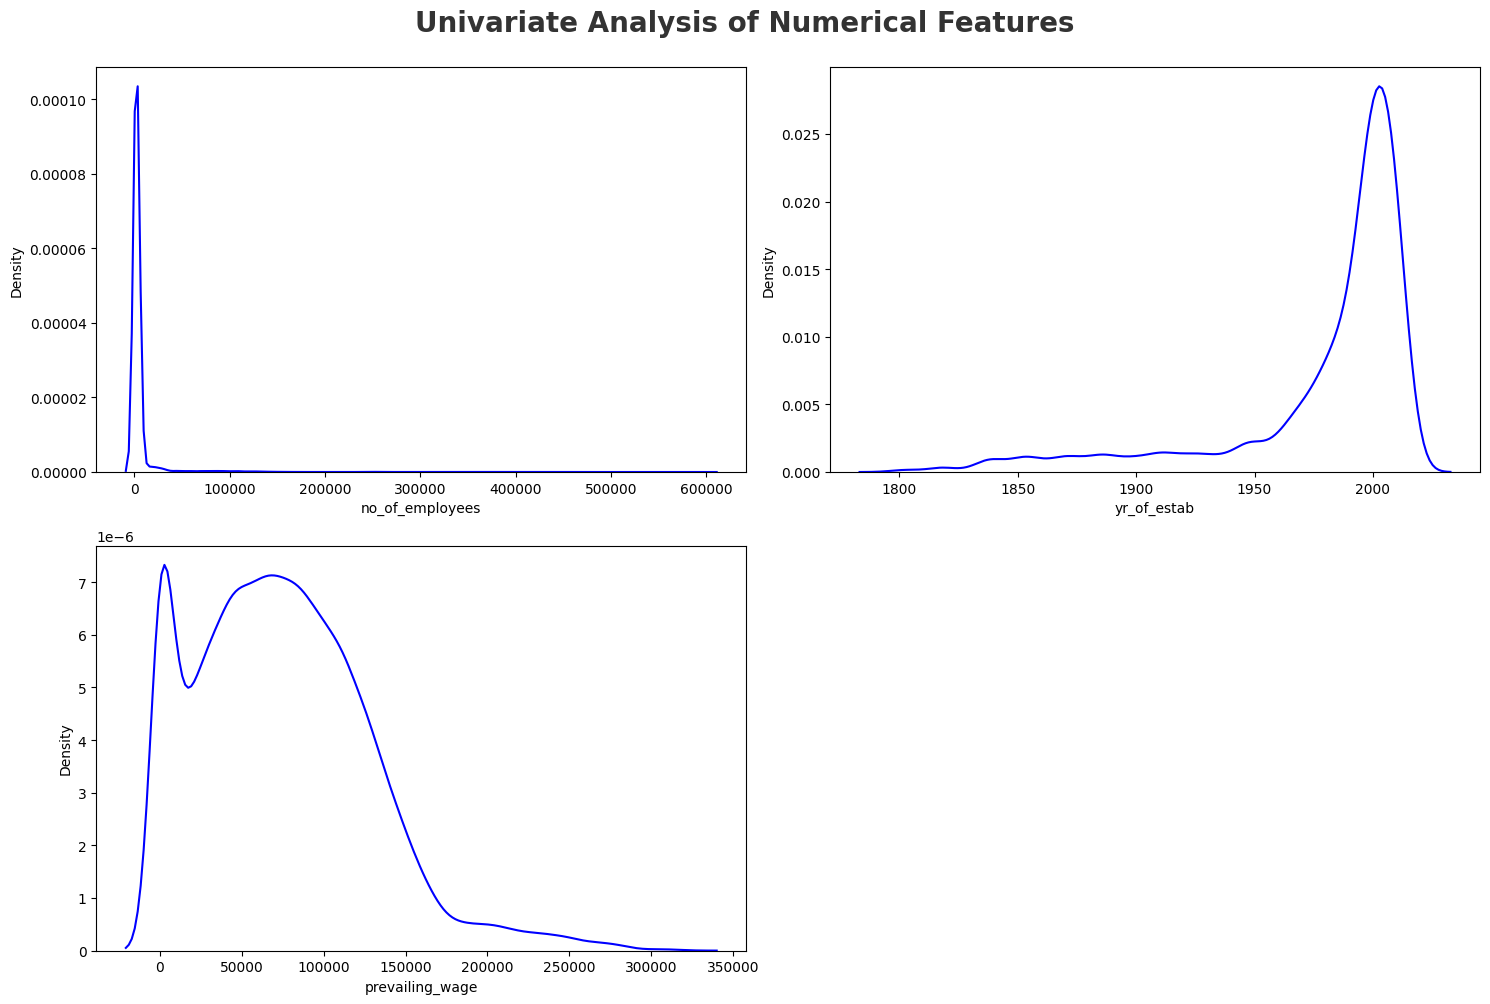

In [34]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

# Categorical Features


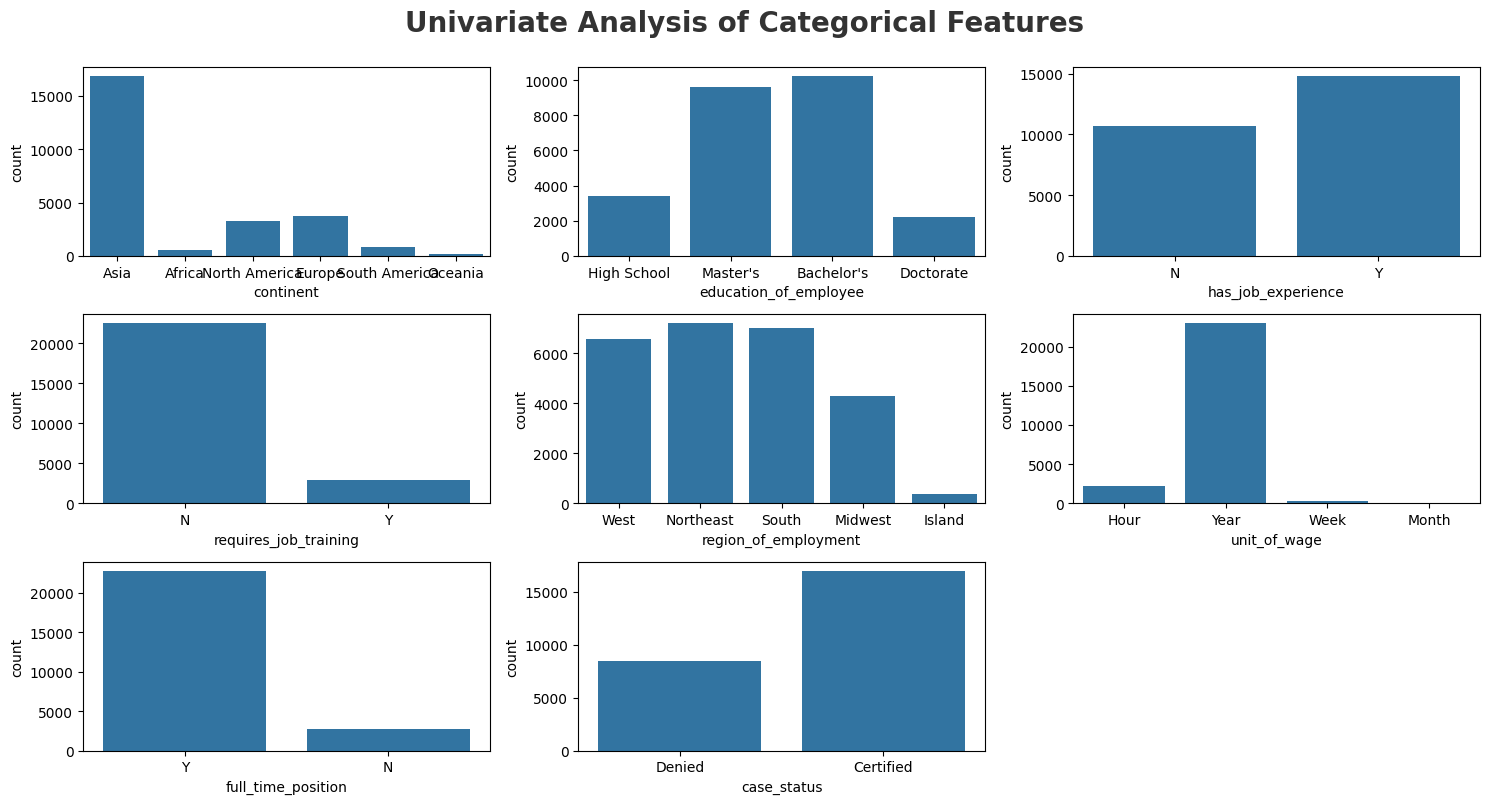

In [36]:
# categorical columns
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

# Insights

- requires_job_training, unit_of_wage, full_time_position and continents coulmns have signle category dominating.
- In rest of the columns are balanced.

## Check Multicollinearity for Categorical features
- A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

- A chi-square statistic is one way to show a relationship between two categorical variables.

- Here we test correlation of Categorical columns with Target column i.e case_status

Null Hypothesis (H0): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis (H1): The Feature and Target column are not independent (Correalted)

In [38]:
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis



- Here requires_job_training fails to Rejects Null Hypothesis which means it doesn't correlate with target column.

In [39]:
# Checking Null Values
df.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [40]:
df.duplicated().sum()

0

- No null values and dupluicate

In [41]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


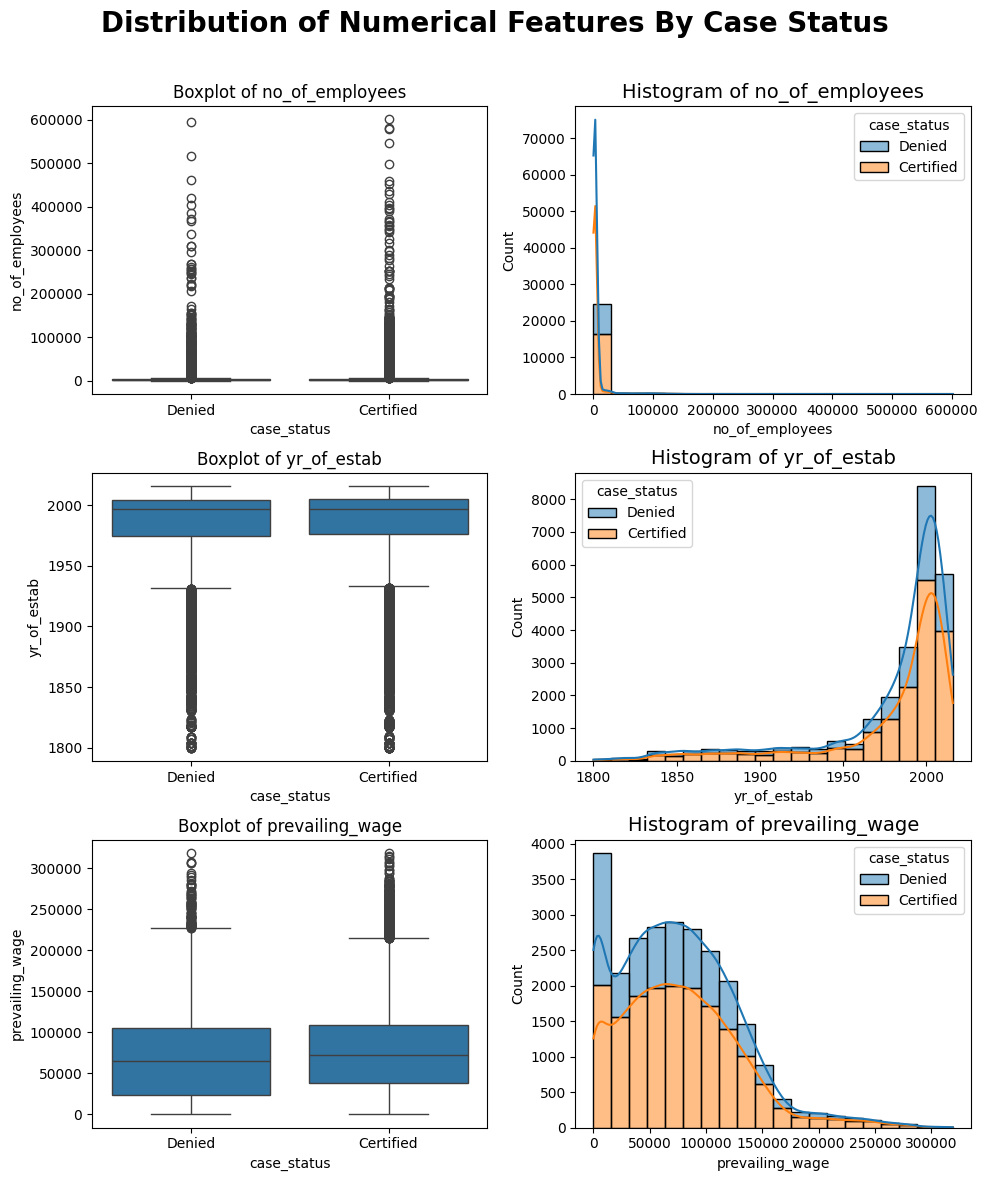

In [42]:
fig, ax = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle('Distribution of Numerical Features By Case Status',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(continues_features):   
    sns.boxplot(data=df, x='case_status', y=col, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='case_status', bins=20, kde=True, 
                 multiple='stack', ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)

# Analysis Report
- No of Employees has many outliers which can be Handled in Feature Engineering and no_of_employees is Right Skewed.
- yr_of_estab is left skewed and some outliers below the lower bound of Box plot.
- prevailing_wage is right skewed with outliers above upper bound of box plot.
- There are No missing values in the dataset.
- The case_id column can be deleted because each row has unique values.
- The case_status column is the target to predict.
- In the Categorical column, features can be made Binary numerical in feature Encoding

# Visualize the Target Feature

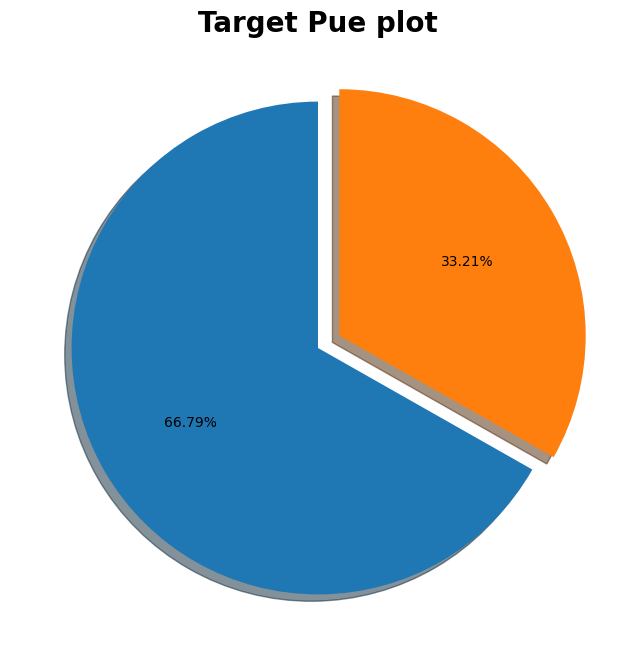

In [ ]:
percentage = df.case_status.value_counts(normalize=True)*100

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)

ax.pie(percentage, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True)

plt.show()

- From the chart it is seen that the Target Variable is Imbalanced

In [ ]:
#group data by continent and their count of case_status
# Cheak Does applicant Continent has any impact on Visa status ?
df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

case_status
continent     case_status             
Africa        Certified      72.050817
              Denied         27.949183
Asia          Certified      65.310480
              Denied         34.689520
Europe        Certified      79.233655
              Denied         20.766345
North America Certified      61.877278
              Denied         38.122722
Oceania       Certified      63.541667
              Denied         36.458333
South America Certified      57.863850
              Denied         42.136150

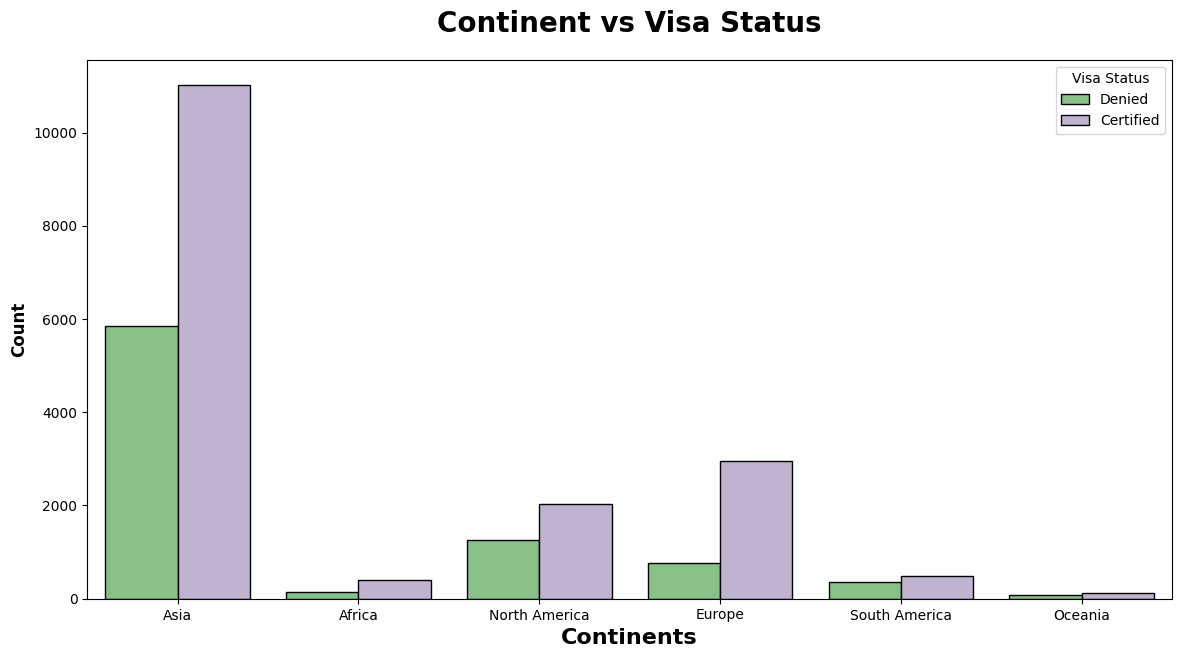

In [46]:
plt.subplots(figsize=(14,7))
sns.countplot(x="continent",hue="case_status", data=df, ec = "black",palette="Accent")
plt.title("Continent vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Continents", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

In [47]:
df2 = df.copy()

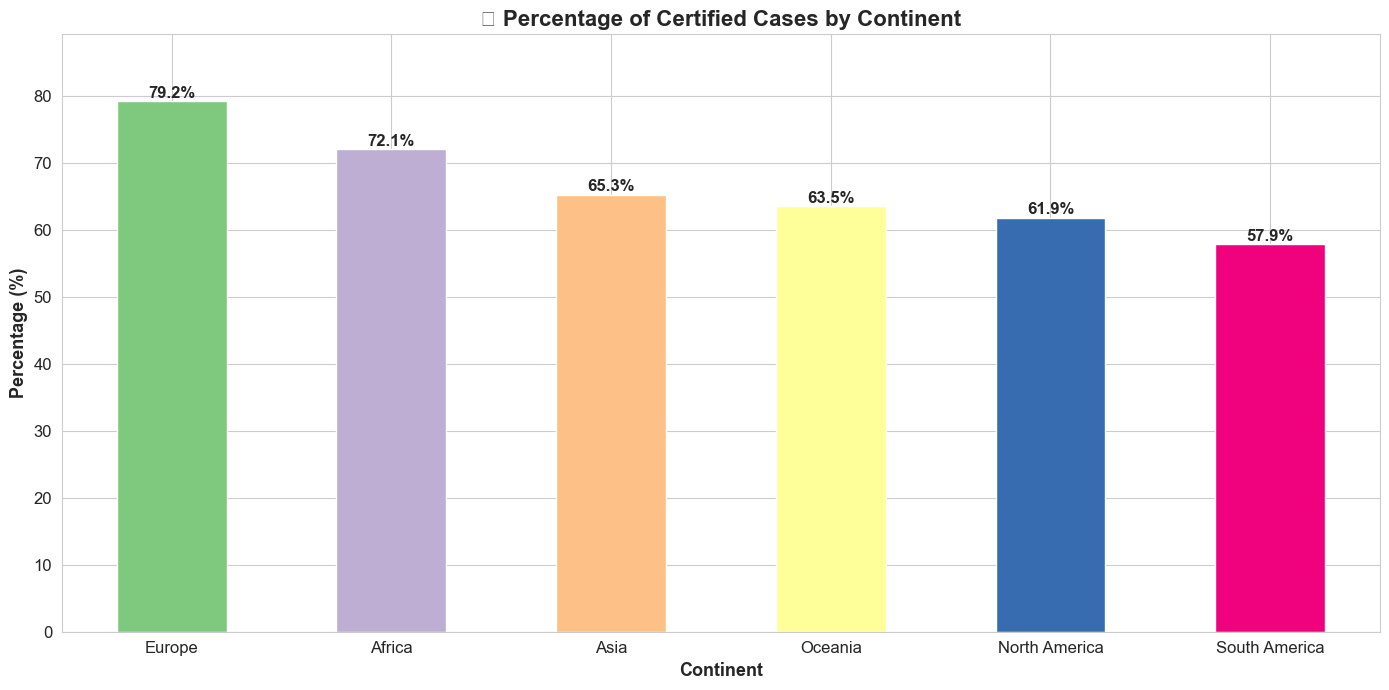

In [ ]:
# Set style
sns.set_style("whitegrid")
plt.figure(figsize=[14, 7])

# Calculate percentage of Certified cases by continent
certified_pct = 100 * df2[df2["case_status"] == 'Certified']['continent'].value_counts() / df2['continent'].value_counts()
certified_pct = certified_pct.sort_values(ascending=False)  # Sort for better visual order

colors = sns.color_palette("Accent", len(certified_pct))
certified_pct.plot(kind='bar', color=colors)

plt.title("📍 Percentage of Certified Cases by Continent", fontsize=16, fontweight='bold')
plt.xlabel("Continent", fontsize=13, fontweight='bold')
plt.ylabel("Percentage (%)", fontsize=13, fontweight='bold')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, certified_pct.max() + 10)

# Add percentage text above bars
for i, (index, value) in enumerate(certified_pct.items()):
    if not pd.isna(value):
        plt.text(i, value + 0.5, f"{value:.1f}%", ha='center', fontsize=12, fontweight='semibold')

# Show plot
plt.tight_layout()
plt.show()


# Report:

- As per the Chart Asia applicants applied more than other continents.
- 43% of Certified applications are from Asia.
- This is followed by Europe with 11% of Certified applications.
- Highest chance of getting certified if you are from Europe and followed by Africa 
- Least chance of getting certified if you are from South America and followed by North America

In [49]:
#group data by Education and their count of case_status
# Cheak Does applicant Education has any impact on Visa status ?
df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).to_frame()*100

case_status
education_of_employee case_status             
Bachelor's            Certified      62.214188
                      Denied         37.785812
Doctorate             Certified      87.226277
                      Denied         12.773723
High School           Denied         65.964912
                      Certified      34.035088
Master's              Certified      78.627777
                      Denied         21.372223

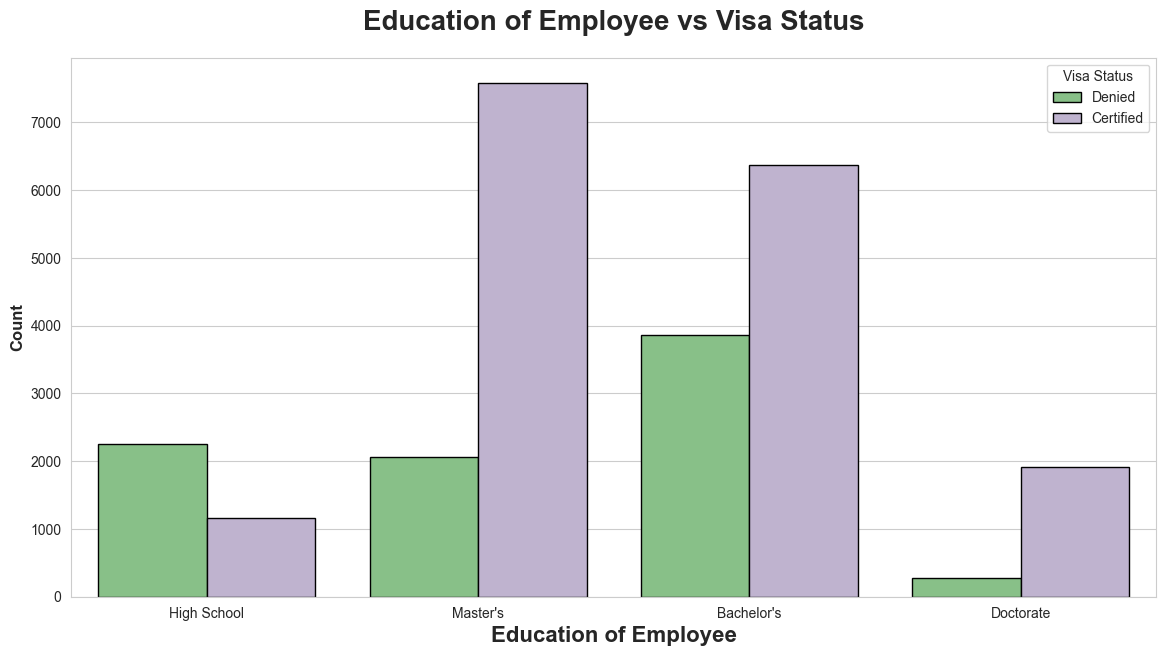

In [50]:
plt.subplots(figsize=(14,7))
sns.countplot(x="education_of_employee",hue="case_status", data=df, ec = "black",palette="Accent")
plt.title("Education of Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Education of Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

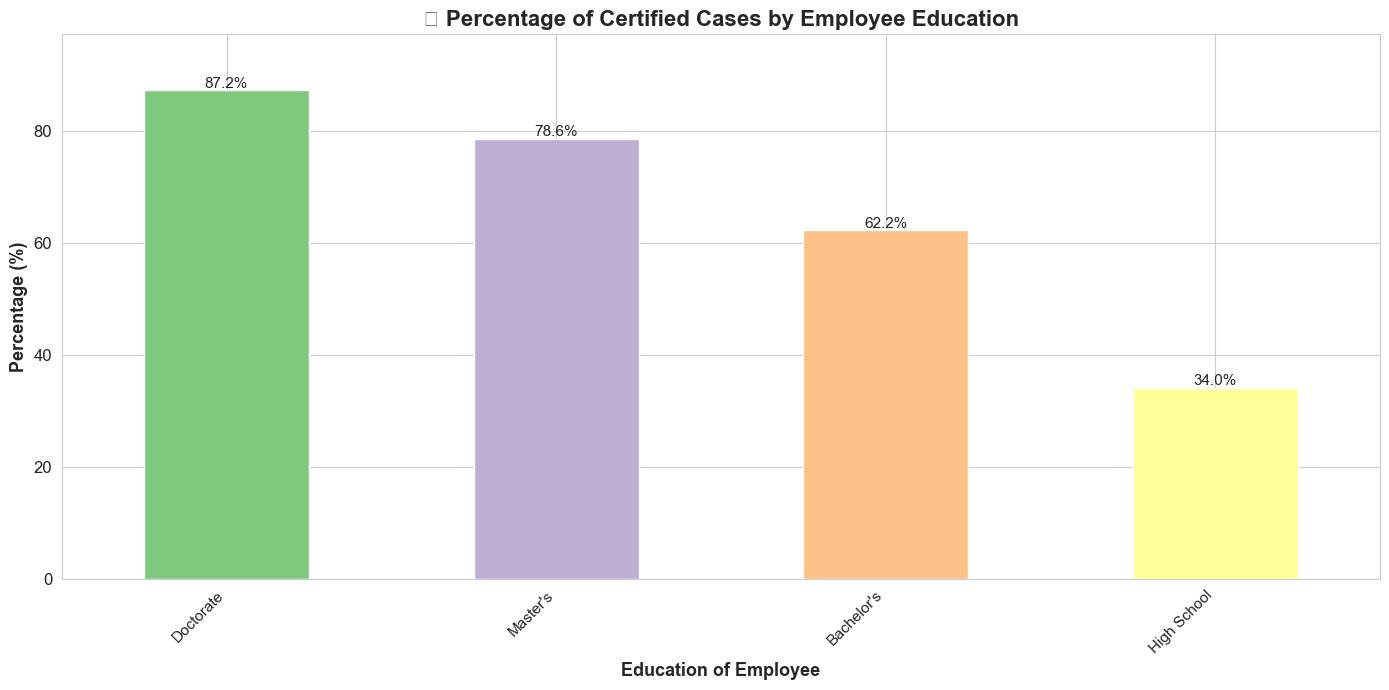

In [51]:
plt.figure(figsize=[14, 7])


certified_pct = (
    100 * df2[df2["case_status"] == "Certified"]["education_of_employee"].value_counts() 
    / df2["education_of_employee"].value_counts()
).sort_values(ascending=False)


colors = sns.color_palette("Accent", len(certified_pct))
certified_pct.plot(kind='bar', color=colors)


plt.title("🎓 Percentage of Certified Cases by Employee Education", fontsize=16, fontweight='bold')
plt.xlabel("Education of Employee", fontsize=13, fontweight='bold')
plt.ylabel("Percentage (%)", fontsize=13, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=12)
plt.ylim(0, certified_pct.max() + 10)


for i, (edu_level, pct) in enumerate(certified_pct.items()):
    if not pd.isna(pct):
        plt.text(i, pct + 0.5, f"{pct:.1f}%", ha='center', fontsize=11, fontweight='medium')

plt.tight_layout()
plt.show()

# Insights

- education status has high impact
- Doctorate and Master's graduates have higher cange of being accepted then the others.

In [52]:
#group data by has_job_experience and count case_status
# Cheak Does applicant has_job_experience has any impact on Visa status ?
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame()*100

case_status
has_job_experience case_status             
N                  Certified      56.134108
                   Denied         43.865892
Y                  Certified      74.476422
                   Denied         25.523578

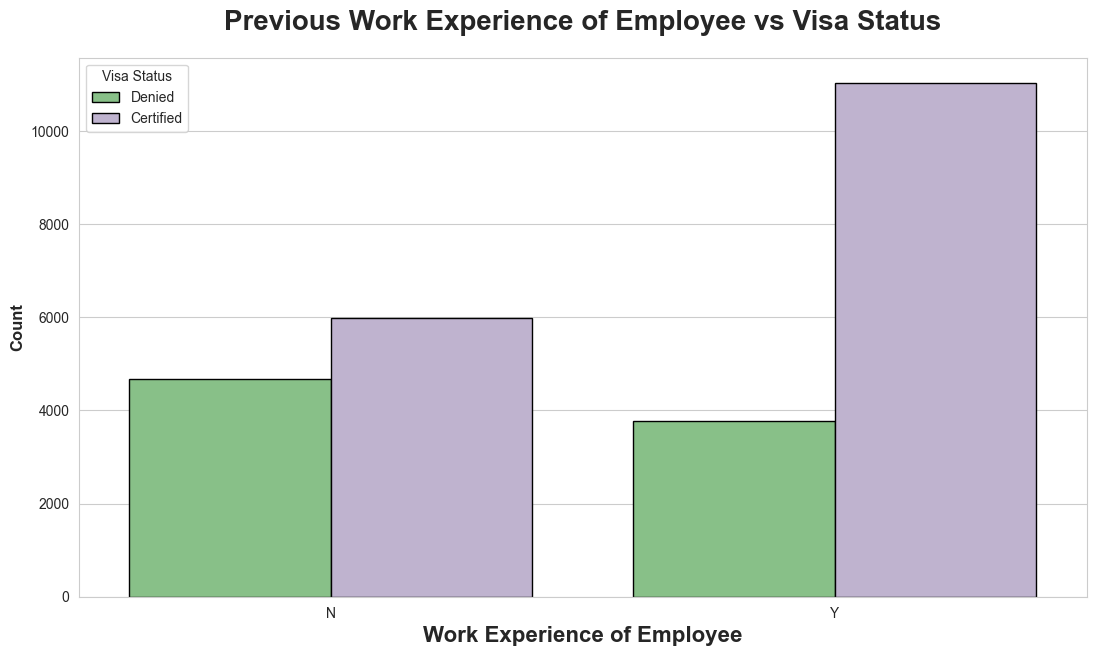

In [53]:
plt.subplots(figsize=(13,7))
sns.countplot(x="has_job_experience",hue="case_status", data=df, ec= "black",palette="Accent")
plt.title("Previous Work Experience of Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Work Experience of Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

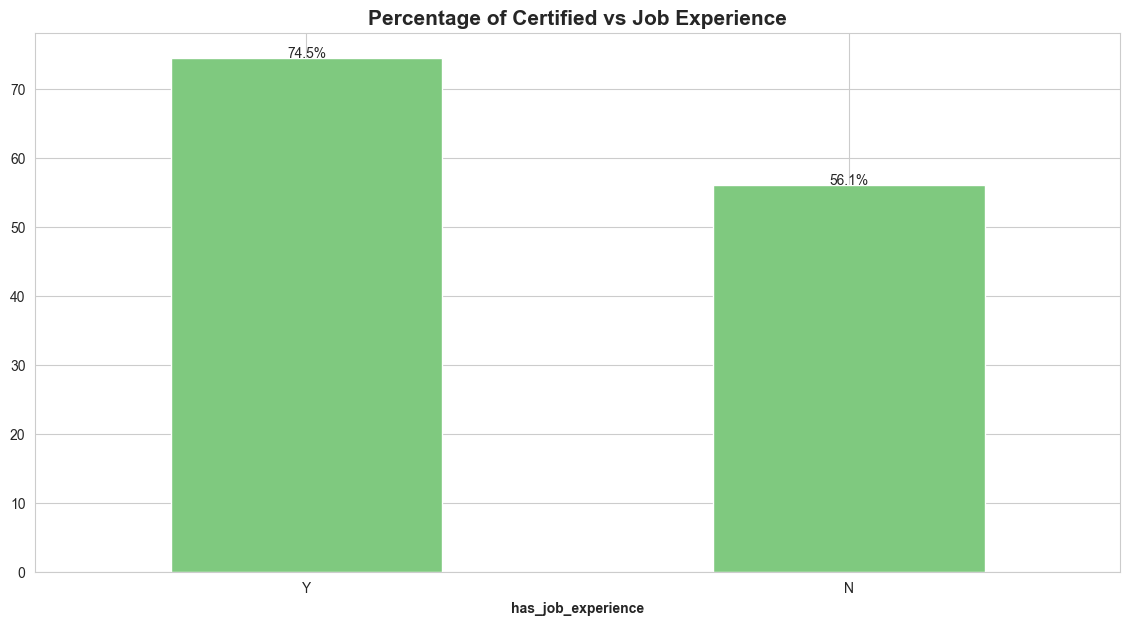

In [54]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Job Experience" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('has_job_experience' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

# Report

- People with previous work experience has been certified 74.5% only 25.5% applicant has been denied.
- People with No previous work experience has been certified 56% and denied 43%.
- This means work experience has effect on Visa status.
- There is a slight edge for the people with work experiences then the fresheres as expected. But the difference is not huge.

In [55]:
#group data by requires_job_training and count 
# Cheak Does applicant requires_job_training has any impact on Visa status ?
df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame()*100

case_status
requires_job_training case_status             
N                     Certified      66.645949
                      Denied         33.354051
Y                     Certified      67.884941
                      Denied         32.115059

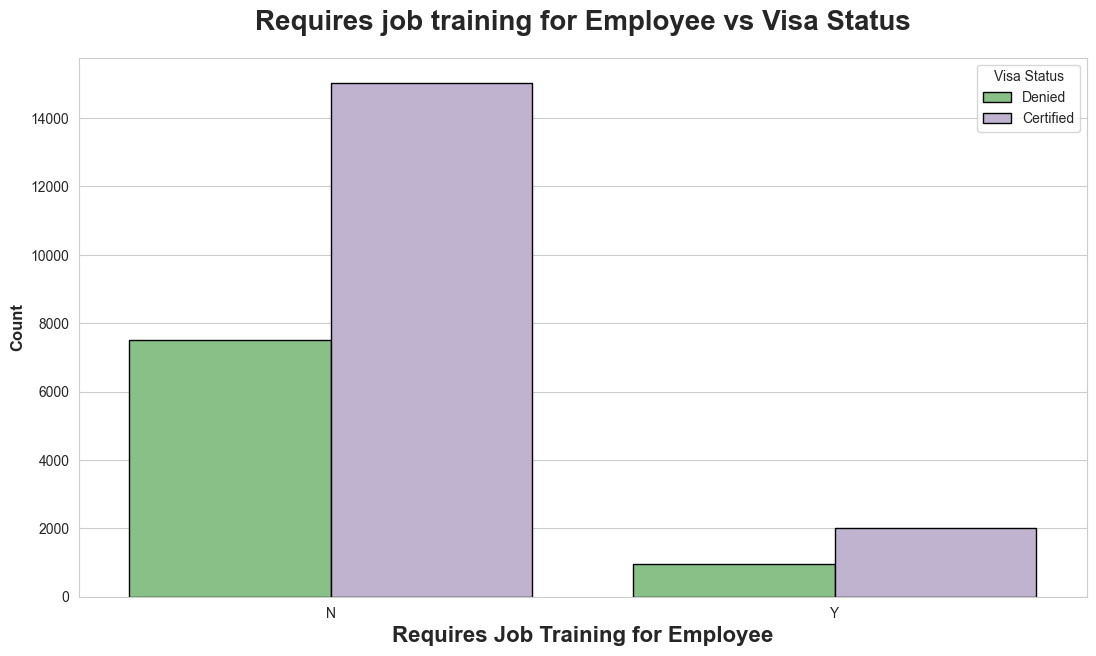

In [56]:
plt.subplots(figsize=(13,7))
sns.countplot(x="requires_job_training",hue="case_status", data=df, ec= "black",palette="Accent")
plt.title("Requires job training for Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

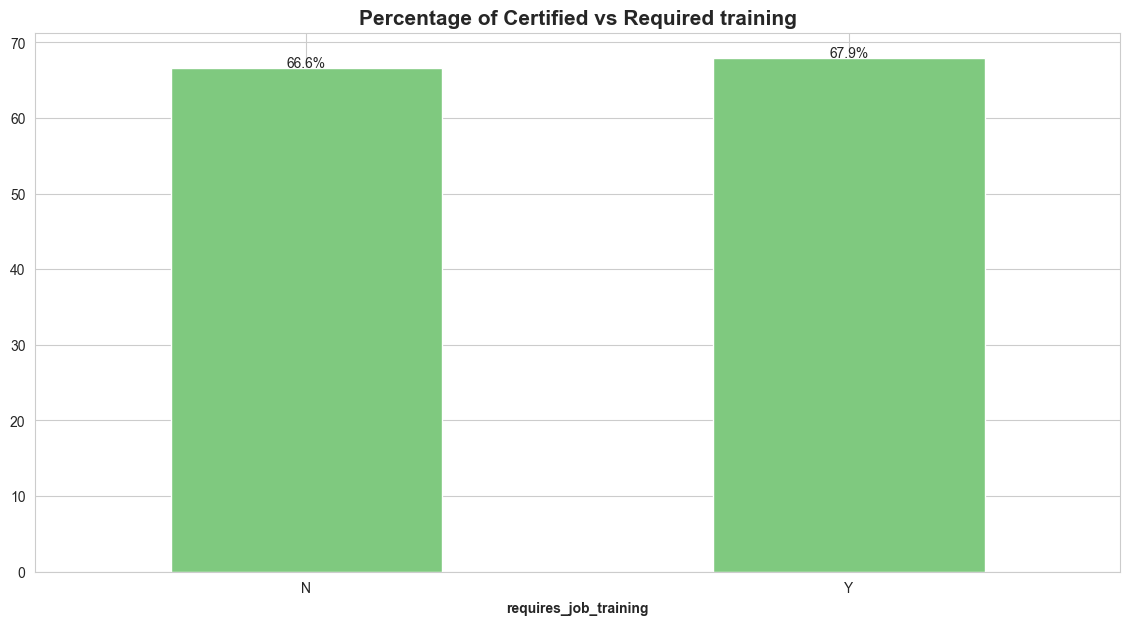

In [57]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Required training" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('requires_job_training' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

# Report

- If employee requires job training and it doesn't have any effect on Visa status.
- 88% of applicant don't require job training.
- 63% of people who doesnt want job training got certified.
- For employees who require job training 67% of people get certified.
- As we checked in Chi-Squared test this feature doesn't have much impact on target variable, which is confirmed by above plot.

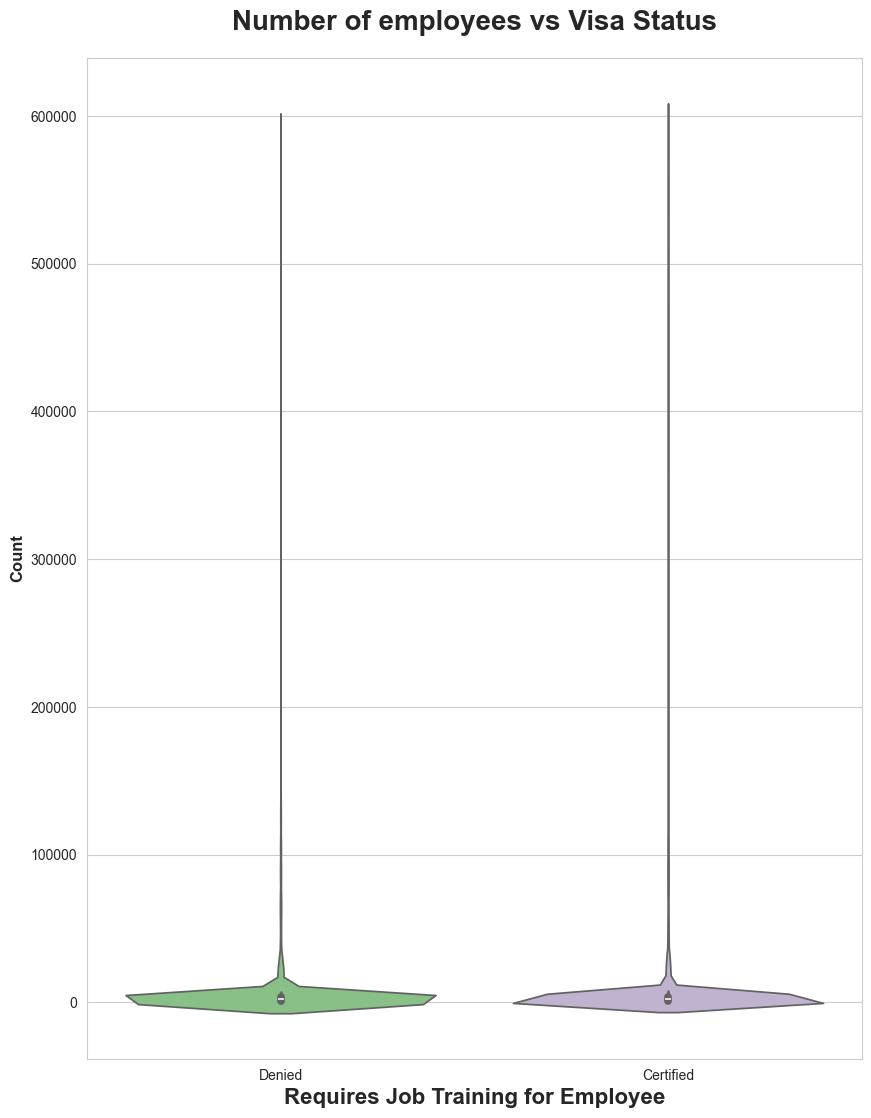

In [58]:
#  Does Number of employees of employer has any impact on Visa status?
plt.subplots(figsize=(10,13))
sns.violinplot(x="case_status",y='no_of_employees', data=df, palette="Accent")
plt.title("Number of employees vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)
plt.ylim()
plt.show()

# Insights

- The distrubution of both is similar. But there are outliers in both the classes which need to be handeled.

In [59]:
#group data by unit_of_wage and count the case_status
# Cheak Does unit_of_wage has any impact on Visa status ?
df.groupby('unit_of_wage')['case_status'].value_counts(normalize=True)

unit_of_wage  case_status
Hour          Denied         0.653686
              Certified      0.346314
Month         Certified      0.617978
              Denied         0.382022
Week          Certified      0.621324
              Denied         0.378676
Year          Certified      0.698850
              Denied         0.301150
Name: case_status, dtype: float64

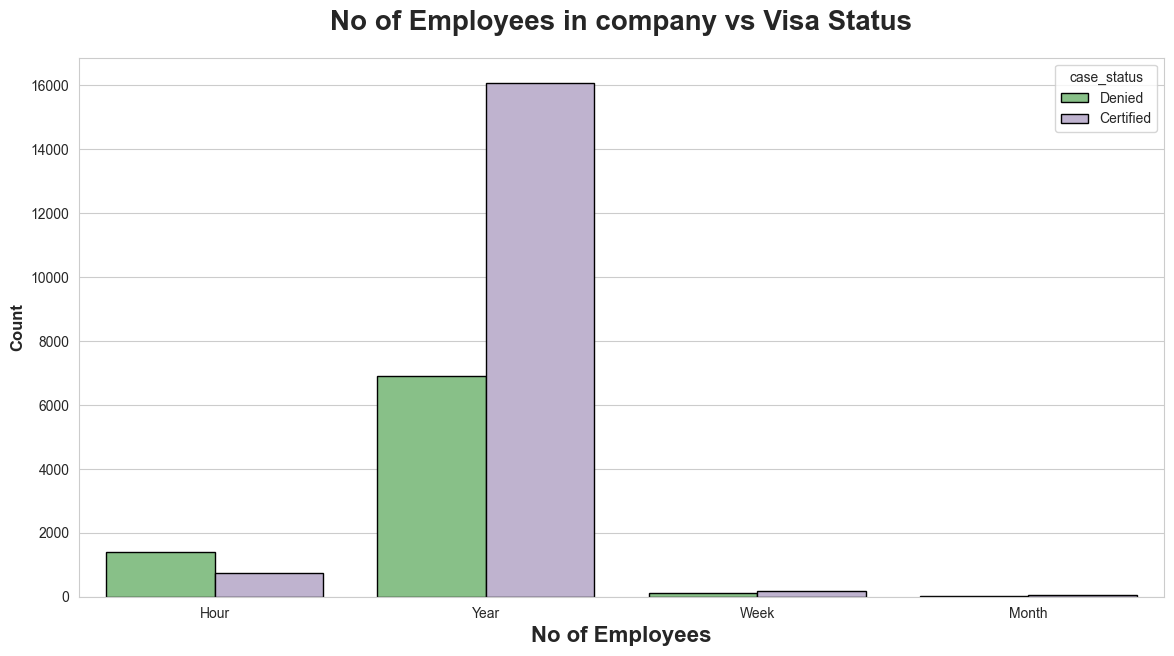

In [60]:
plt.subplots(figsize=(14,7))
sns.countplot(x="unit_of_wage",hue="case_status", data=df,ec='k', palette='Accent')
plt.title("No of Employees in company vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("No of Employees", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

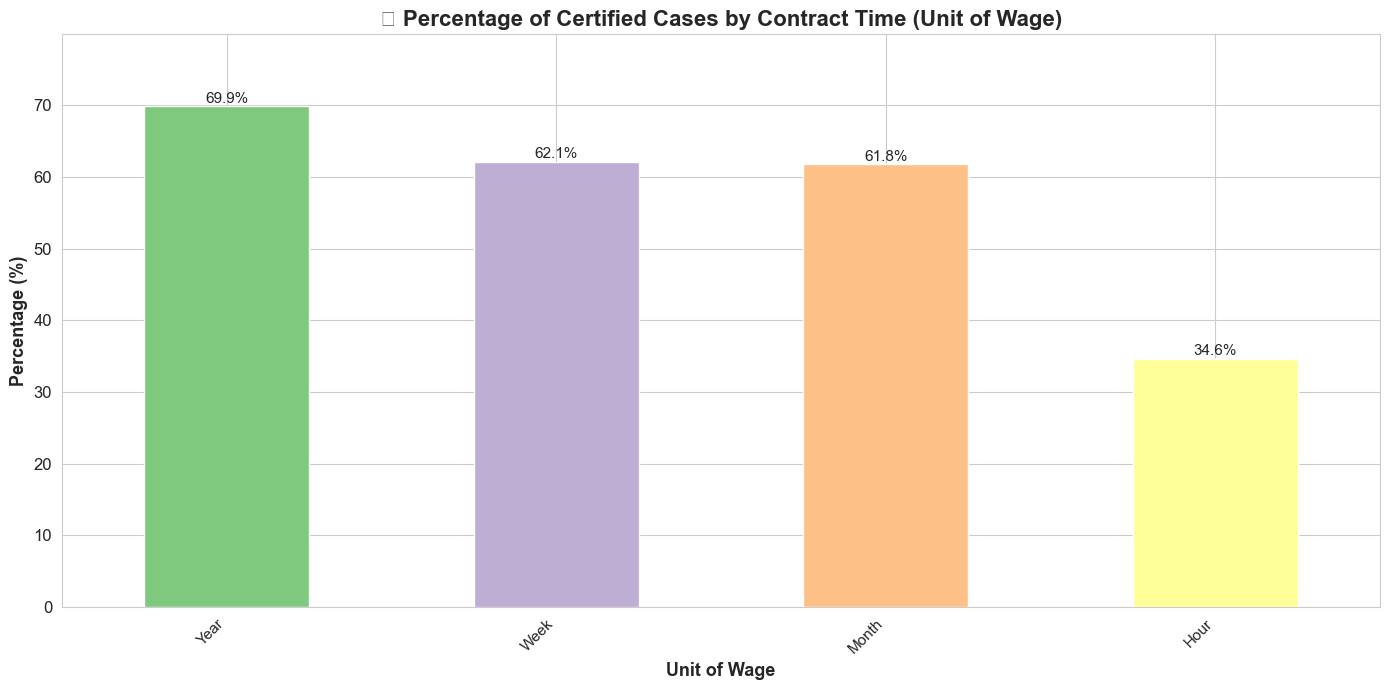

In [62]:
plt.figure(figsize=[14, 7])


certified_pct = (
    100 * df2[df2["case_status"] == "Certified"]["unit_of_wage"].value_counts() 
    / df2["unit_of_wage"].value_counts()
).sort_values(ascending=False)


colors = sns.color_palette("Accent", len(certified_pct))
certified_pct.plot(kind='bar', color=colors)

# Title and axis labels
plt.title("💼 Percentage of Certified Cases by Contract Time (Unit of Wage)", fontsize=16, fontweight='bold')
plt.xlabel("Unit of Wage", fontsize=13, fontweight='bold')
plt.ylabel("Percentage (%)", fontsize=13, fontweight='bold')
plt.xticks(rotation=45, fontsize=11, ha='right')
plt.yticks(fontsize=12)
plt.ylim(0, certified_pct.max() + 10)

# Annotate each bar with percentage value
for i, (label, pct) in enumerate(certified_pct.items()):
    if not pd.isna(pct):
        plt.text(i, pct + 0.5, f"{pct:.1f}%", ha='center', fontsize=11, fontweight='medium')

plt.tight_layout()
plt.show()

# Report

- For employees who applied for hourly pay 65% of them were denied.
- Yearly unit wage application were accepted for 69% and denied for 31% of the time.
- There is a higher chance of yearly contract than other and immediately followed by week and month.

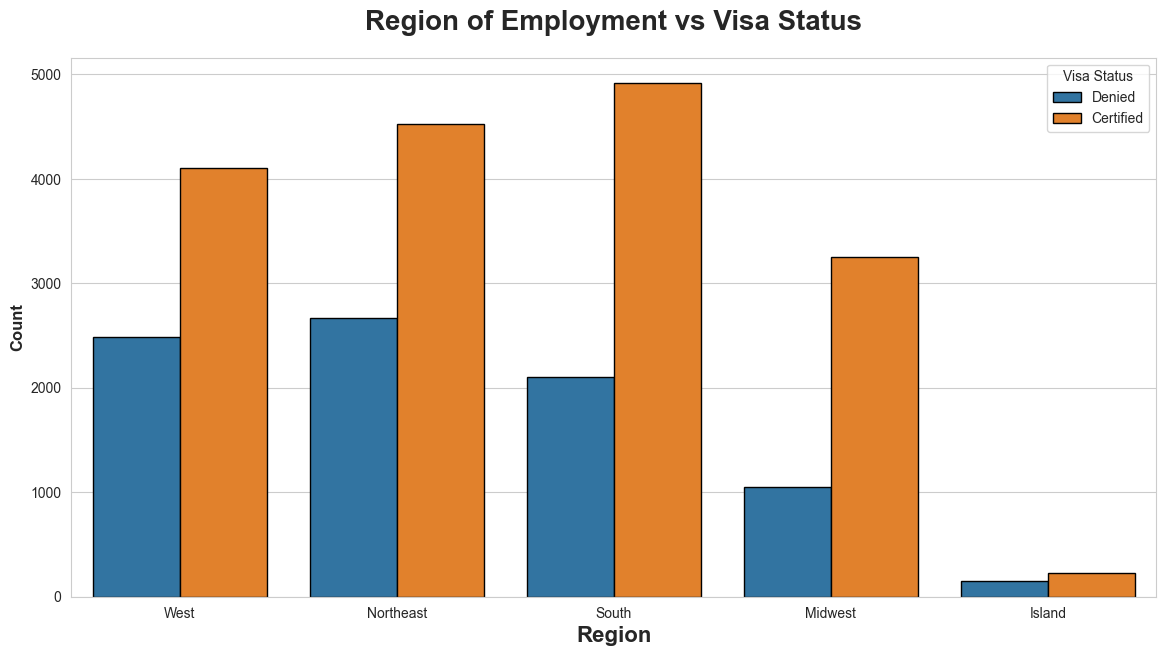

In [63]:
# cheack Does Region of employment has impact on Visa status ?
plt.subplots(figsize=(14,7))
sns.countplot(x="region_of_employment",hue="case_status", data=df,ec='k')
plt.title("Region of Employment vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

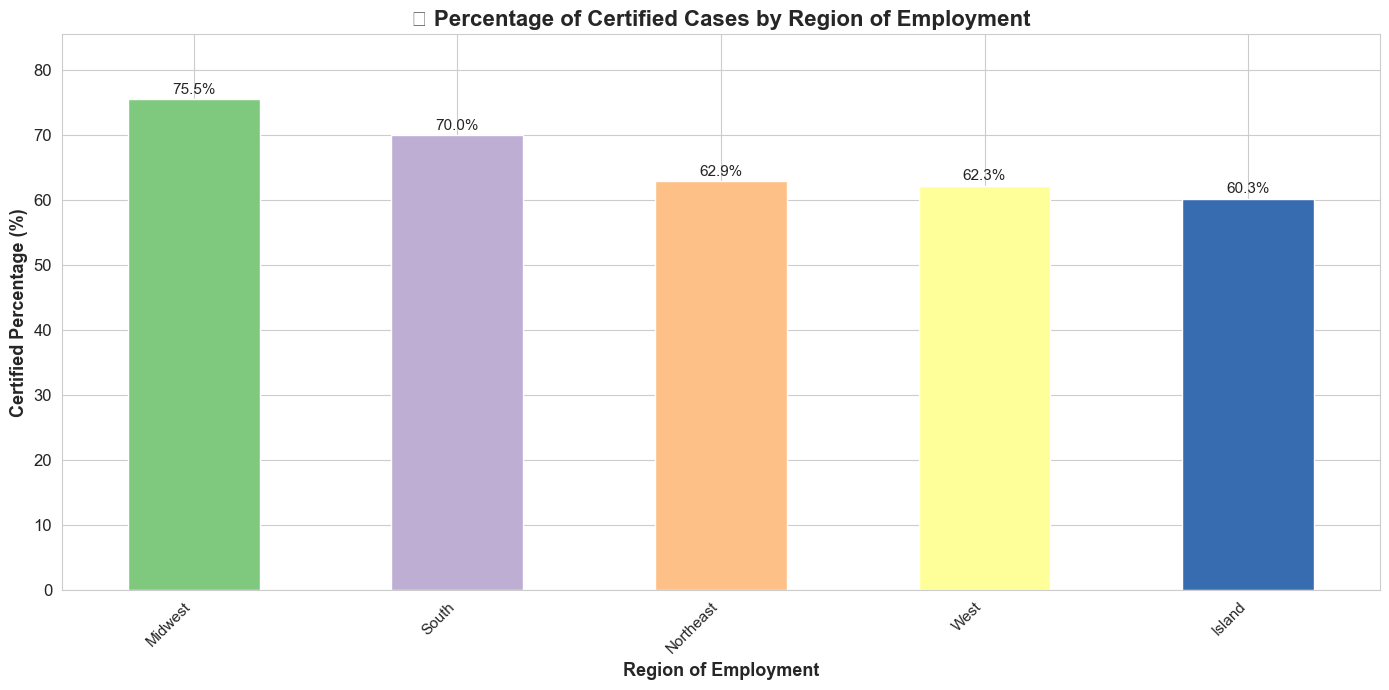

In [64]:
plt.figure(figsize=[14, 7])

# Calculate percentage of certified cases per region
certified_pct = (
    100 * df2[df2["case_status"] == "Certified"]["region_of_employment"].value_counts() 
    / df2["region_of_employment"].value_counts()
).sort_values(ascending=False)

colors = sns.color_palette("Accent", len(certified_pct))

certified_pct.plot(kind='bar', color=colors)

plt.title("📍 Percentage of Certified Cases by Region of Employment", fontsize=16, fontweight='bold')
plt.xlabel("Region of Employment", fontsize=13, fontweight='bold')
plt.ylabel("Certified Percentage (%)", fontsize=13, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=12)
plt.ylim(0, certified_pct.max() + 10)

# Annotate bars with percentage values
for i, (region, pct) in enumerate(certified_pct.items()):
    if not pd.isna(pct):
        plt.text(i, pct + 0.8, f"{pct:.1f}%", ha='center', fontsize=11, fontweight='medium')

plt.tight_layout()
plt.show()

# Report

- As per chart all the region have very similar pattern of getting Visa certified and Denied.
- There is a slight edge for midwest followed by South region

In [65]:
# Does Prevailing wage has any impact on Visa status ?
df.groupby('prevailing_wage').case_status.value_counts()

prevailing_wage  case_status
2.1367           Certified      1
2.9561           Denied         1
3.0031           Denied         1
3.3188           Denied         1
3.4889           Certified      1
                               ..
311734.4900      Certified      1
314156.0600      Certified      1
315497.6000      Certified      1
318446.0500      Certified      1
319210.2700      Denied         1
Name: case_status, Length: 25462, dtype: int64

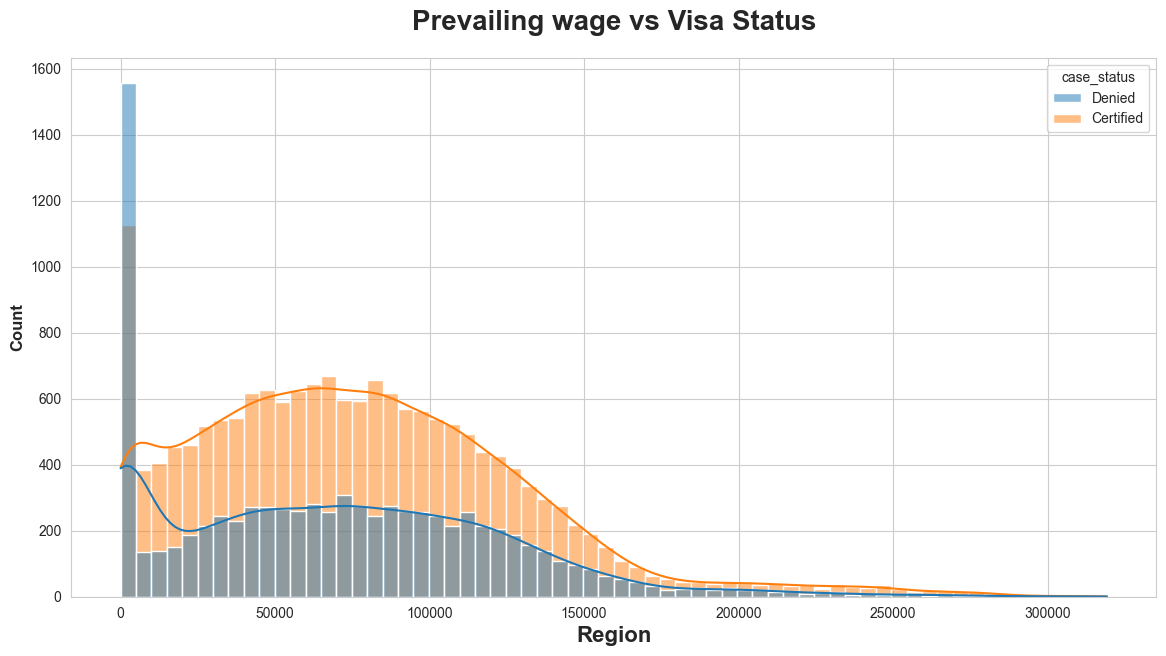

In [66]:
plt.subplots(figsize=(14,7))
sns.histplot(x="prevailing_wage",hue="case_status", data=df, kde=True)
plt.title("Prevailing wage vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

# Insights

- The distribution of both the classes are same but need to handel the outliers.

In [67]:
# Average Prevailing wage based on Employee education 
df.groupby('education_of_employee')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

,prevailing_wage
education_of_employee,
Master's,78843.057843
Bachelor's,73405.443735
High School,71582.147756
Doctorate,64561.076657


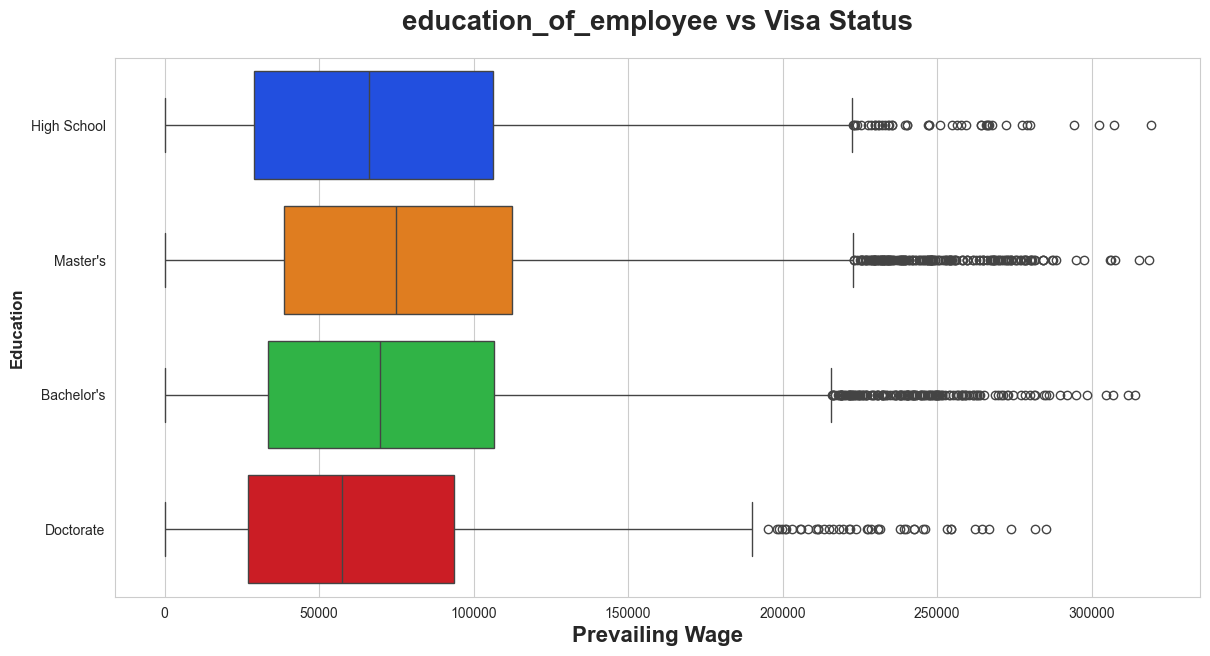

In [68]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="education_of_employee",x = "prevailing_wage", data=df,palette='bright')
plt.title("education_of_employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("Education", weight="bold", fontsize=12)
plt.show()

# Report

- Based on the above table and charts its seen that applicant with Master's education has higher average prevailing wages.
- Master's education applicants have median salary of $78.8k, which approximately 20% higher than Doctrate's average wage, which is strange.

In [69]:
# Median Prevailing wage based on Job experience
df.groupby('has_job_experience')['prevailing_wage'].median().to_frame().sort_values(by='prevailing_wage',ascending=False)

,prevailing_wage
has_job_experience,
N,72602.290
Y,69033.665


# Report

- Suprisingly people who has less job experience has more prevailing wage.
- job experience applicant has median prevailing wage as 72k USD.
- Previous job experience applicant has median prevailing wage as 69K USD.

In [70]:
# Average Prevailing wage based on Continent
df.groupby('continent')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

,prevailing_wage
continent,
Asia,79543.021780
Africa,77425.923450
Oceania,75994.276719
North America,68066.319257
South America,60209.575314
Europe,59842.925899


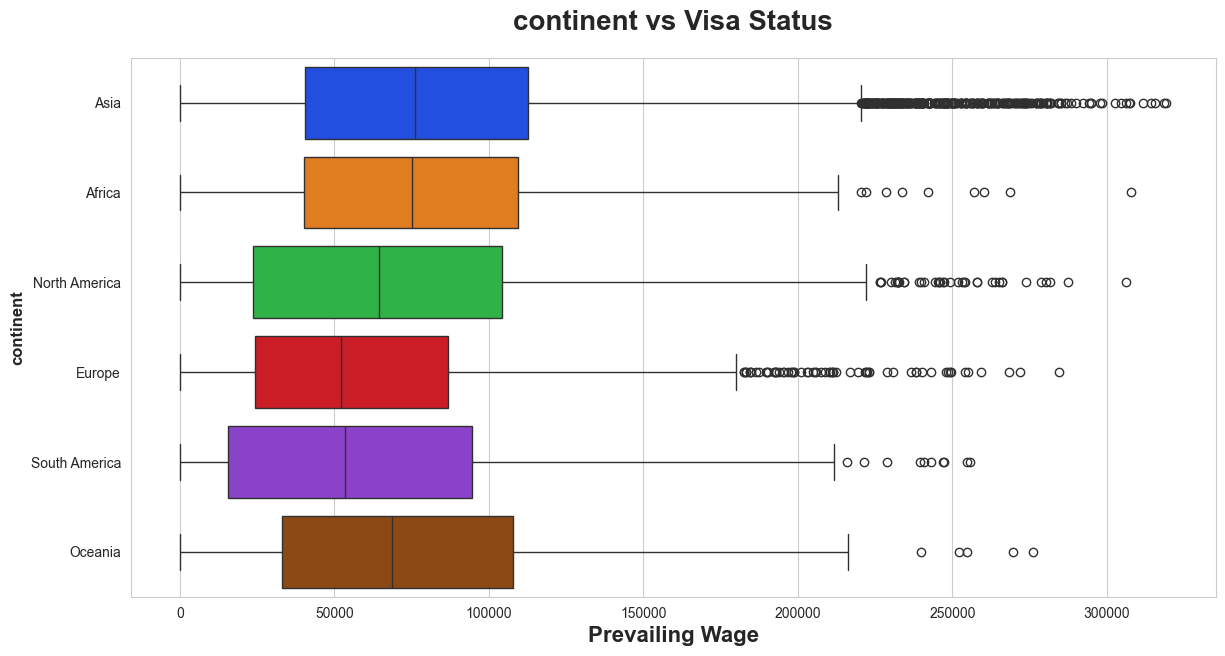

In [71]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="continent",x = "prevailing_wage", data=df,palette='bright')
plt.title("continent vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("continent", weight="bold", fontsize=12)
plt.show()

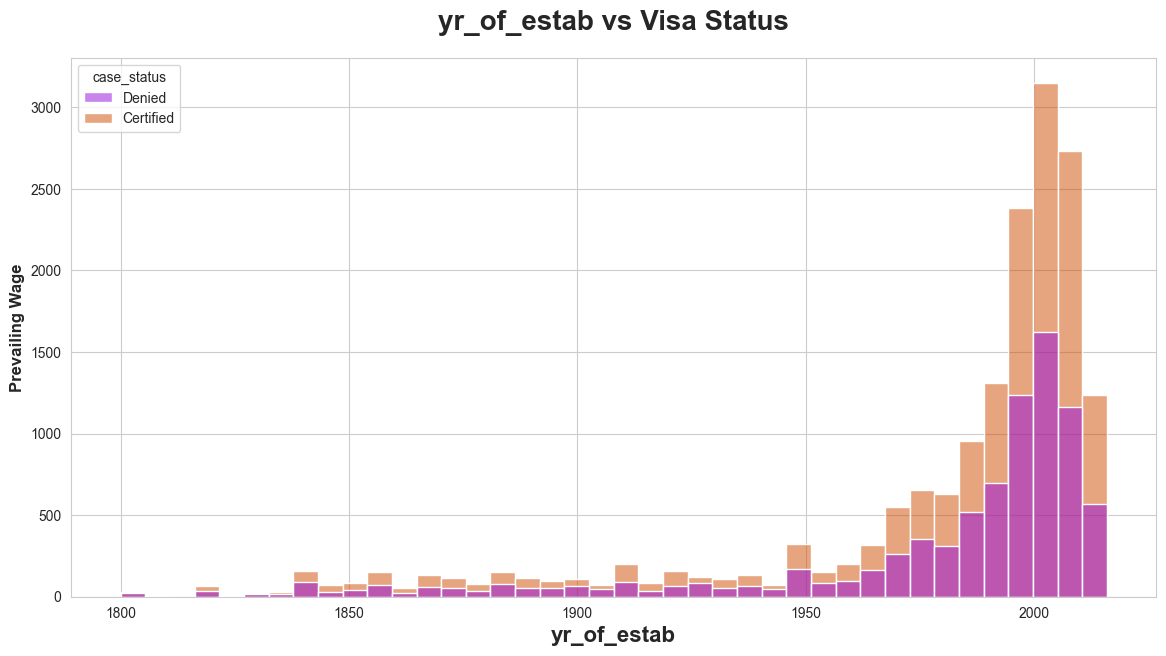

In [72]:
# Year of Establishment
plt.subplots(figsize=(14,7))
sns.histplot(x = "yr_of_estab", data=df,palette='gnuplot', bins=40, hue='case_status')
plt.title("yr_of_estab vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("yr_of_estab", weight="bold", fontsize=16)
plt.ylabel("Prevailing Wage", weight="bold", fontsize=12)
plt.show()


# Report

- Each bins consists of 5 years.
- Many companies were established after year 2000.
- The most company establishment happened in year 2000-2005.